In [110]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
#reading csv file to a Dataframe
coffee_production = pd.read_csv("coffee/total-production.csv").T
coffee_production.columns= coffee_production.iloc[0]
coffee_production.drop("total_production", inplace=True)

# Meshgrid - Single Figure Report on Brazil's Place in Global Coffee Market

* Create a Meshgrid Layout to combine our findings from our first project into a single report. 
* We want the two donut charts representing Brazil's production share in 1990 and 2018 in the top third of the figure. 
* The stackplot comparing Brazil to the rest of the world in the center of the figure. 
* In the bottom third a bar chart showing the total production of our top 5 countries, as well as a bar for other. Also include a pie chart showing the composition of the same data plotted in the bar chart. 
* Look up the country colors for our top 5 countries and color them accordingly. For 'other' category, color these grey.
* Consider setting rcParams to turn top and right borders off.
* Save the report out as an image.

In [3]:
#Top five rows of the Dataframe
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [4]:
axes_settings = {}

plt.rc("axes", **axes_settings)

### Data Prep

In [5]:
#Slicing - Brazil's production vs rest of the producers
brazil_vs_others = coffee_production.assign(rest_of_world = coffee_production.drop('Brazil',axis=1).sum(axis=1))
brazil_vs_others = brazil_vs_others[['Brazil', 'rest_of_world']].astype('float')
brazil_vs_others.index = brazil_vs_others.index.astype('datetime64[ns]')
brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990-01-01,27285.6286,65944.431
1991-01-01,27293.4934,73973.191
1992-01-01,34603.3542,63922.545
1993-01-01,28166.9786,63597.643
1994-01-01,28192.0470,65121.147


In [105]:
#slicing - top 5 coffee producers
top_5_producers = pd.DataFrame(coffee_production.loc['2018', :].sort_values(ascending=False).iloc[:5])
top_5_producers

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234


In [108]:
# Calculating total production less production by top 5 producers
top_5_countries_names = top_5_producers.index
rest_of_the_world = pd.DataFrame({'2018':coffee_production.drop(labels=top_5_ls,axis=1).loc['2018'].sum()},
                                 index=['Rest World'])
rest_of_the_world

,2018
Rest World,45786.0003


In [109]:
# Dataframe of top 5 producers and the rest of the world
coffee_production_top5_2018 = pd.concat([top_5, rest_world])                                                    
coffee_production_top5_2018

,2018
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest World,45786.0003


### Meshgrid Layout

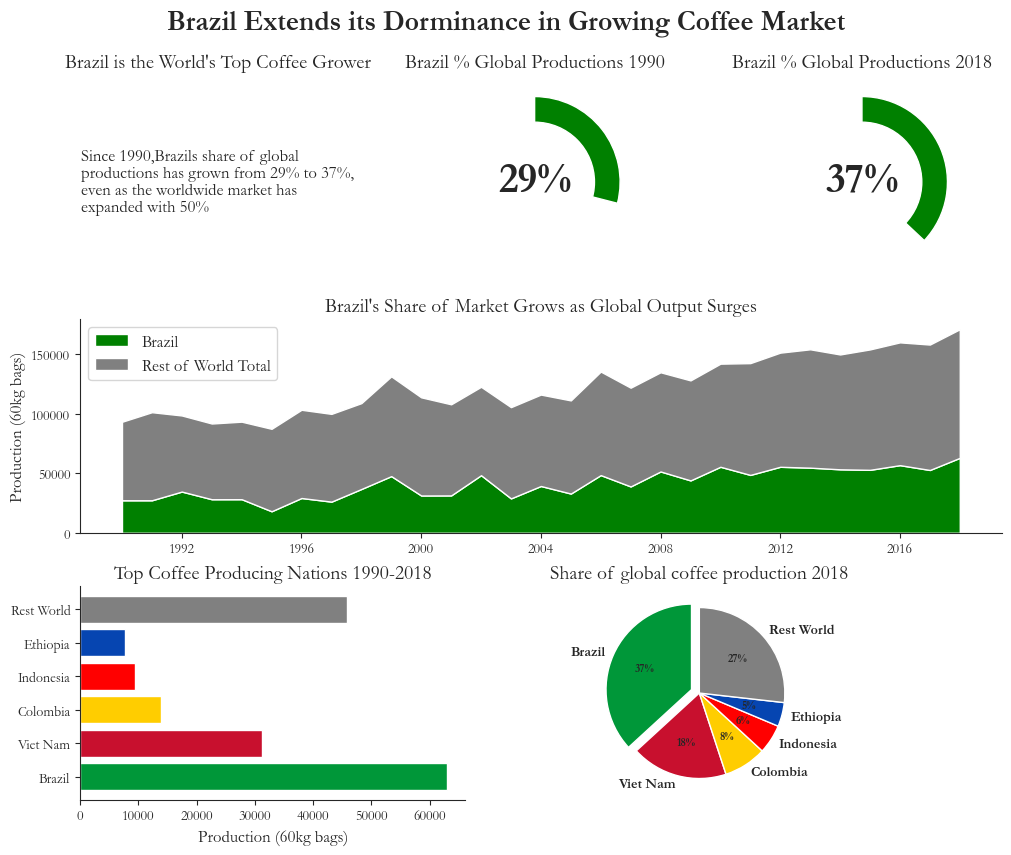

In [112]:
#Setting up runtime configuration parameters rcParams
plt.rc('axes.spines', right=False, left=False, top=False, bottom=False)
plt.rc('xtick', bottom=False, labelbottom=False, labelsize=10.0)
plt.rc('ytick', left=False, labelleft=False, labelsize=10.0)
plt.rc('font', family='Garamond', size=12, weight='normal')
plt.rc('axes', titleweight='normal', titlesize=14)
plt.rc('figure', titleweight='bold', titlesize=20)
#sns.set_style('white')

#Setting up the canvas
fig = plt.figure(figsize=(10,8),layout='constrained')
fig.suptitle('Brazil Extends its Dorminance in Growing Coffee Market', y= 1.05)
gs = gridspec.GridSpec(nrows=9, ncols=9, figure=fig)

#Country flag colors [Brazil, Vietnam, Colombia, Indonesia, Ethiopia, Rest_of_the_world]
COLORS = ['#009739', '#C8102E', '#FFCD00', '#FF0000', '#0645B1', '#808080']


#Text box
TEXT = '''
Since 1990,Brazils share of global
productions has grown from 29% to 37%,
even as the worldwide market has
expanded with 50%
'''
ax1 = fig.add_subplot(gs[:3, :3])
ax1.set_title('Brazil is the World\'s Top Coffee Grower')
ax1.text(x=0.5,y=0.5,s=TEXT, ha='center', va='center', ma='left')

#Donut chart1
percentages=[0.71, 0.29]
ax2 = fig.add_subplot(gs[:3, 3:6])
ax2.set_title('Brazil % Global Productions 1990')
ax2.pie(percentages, startangle=90, colors=['white', 'green'])
hole=plt.Circle((0,0), 0.70, fc='white')
fig=plt.gcf()
fig.gca().add_artist(hole)
plt.text(x=0, y=0, s=f'{round(percentages[1]*100)}%',ha='center',va='center',size=30, weight='bold')

#Donut chart2
percentages=[0.63, 0.37]
ax3 = fig.add_subplot(gs[:3, 6:9])
ax3.set_title('Brazil % Global Productions 2018')
ax3.pie(percentages, startangle=90, colors=['white', 'green'])
hole=plt.Circle((0,0), 0.70, fc='white')
fig=plt.gcf()
fig.gca().add_artist(hole)
plt.text(x=0, y=0, s=f'{round(percentages[1]*100)}%',ha='center',va='center',size=30, weight='bold')

#Stackplot
plt.rc('axes.spines', right=False, top=False, bottom=True, left='True')
plt.rc('xtick', bottom=True, labelbottom=True)
plt.rc('ytick', left=True, labelleft=True)
ax4 = fig.add_subplot(gs[3:6, :9])
ax4.set_title('Brazil\'s Share of Market Grows as Global Output Surges')
ax4.stackplot(brazil_vs_others.index,
              brazil_vs_others['Brazil'],
              brazil_vs_others['rest_of_world'],
              labels=['Brazil', 'Rest of World Total'],
              colors=['green', 'gray']
             );
ax4.legend(loc='upper left')
ax4.set_ylabel('Production (60kg bags)')


#Horizontal Bar Chart
ax5 = fig.add_subplot(gs[6:9, :4])
ax5.set_title('Top Coffee Producing Nations 1990-2018')
ax5.barh(y=coffee_production_top5_2018.index,
         width=coffee_production_top5_2018['2018'],
         color=COLORS
        )
ax5.set_xlabel('Production (60kg bags)')


#Pie chart
plt.rc('font', size=8.0, weight='bold') #fontsize and wight of the piechart
plt.rc('axes', titlesize=14.0) #titlesize of the pie chart
ax6 = fig.add_subplot(gs[6:9, 4:8])
ax6.set_title('Share of global coffee production 2018')
ax6.pie(x=coffee_production_top5_2018['2018'],
        startangle=90,
        labels=coffee_production_top5_2018.index,
        explode=(0.1,0,0,0,0,0),
        autopct='%.0f%%',
        colors=COLORS
       );
plt.savefig('meshgrid1.jpeg',dpi=1000)

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [9]:
prices_paid_to_growers = pd.read_csv("coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

In [113]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


In [131]:
prices_paid_to_growers['Other Nations'] = prices_paid_to_growers.drop(labels=['Brazil', 'Colombia', 'Ethiopia'], axis=1).sum(axis=1)

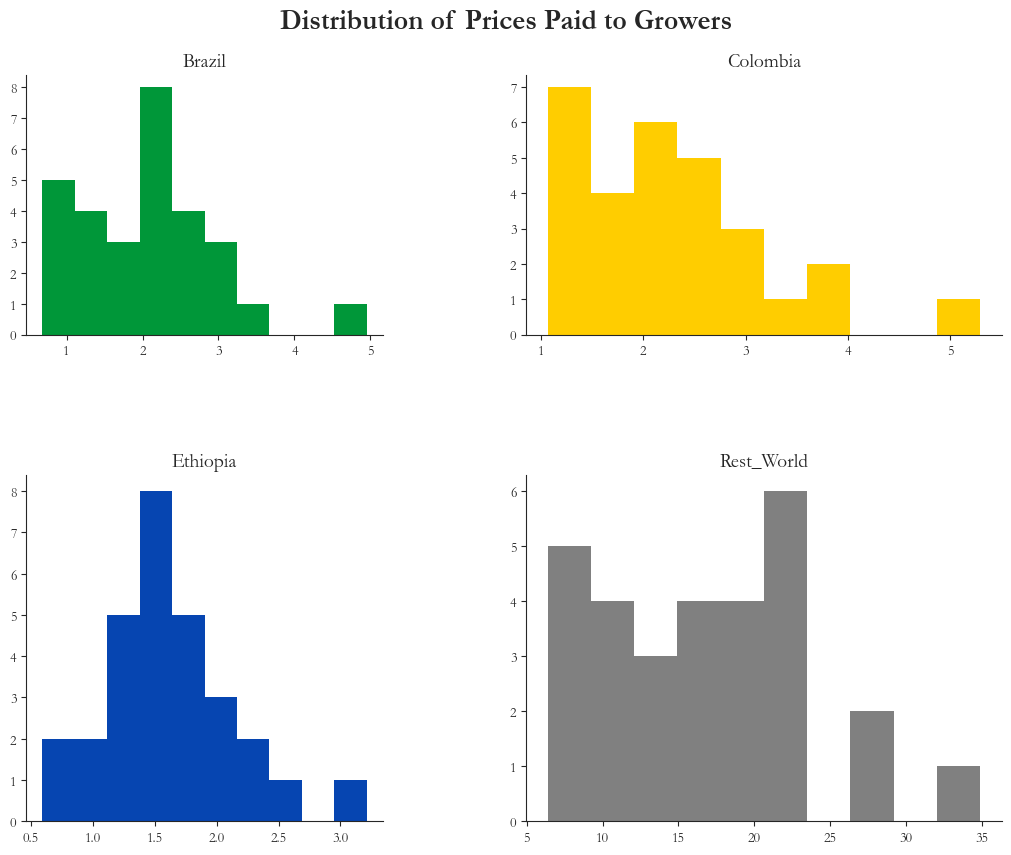

In [140]:
#Setting up runtime configuration parameters rcParams
plt.rc('axes.spines', right=False, left=True, top=False, bottom=True)
plt.rc('xtick', bottom=True, labelbottom=True, labelsize=10.0)
plt.rc('ytick', left=True, labelleft=True, labelsize=10.0)
plt.rc('font', family='Garamond', size=12, weight='normal')
plt.rc('axes', titleweight='normal', titlesize=14)
plt.rc('figure', titleweight='bold', titlesize=20)
#sns.set_style('white')

#Country flag colors [Brazil, Vietnam, Colombia, Indonesia, Ethiopia, Rest_of_the_world]
COLORS = ['#009739', '#C8102E', '#FFCD00', '#FF0000', '#0645B1', '#808080']

#Setting up the canvas
fig = plt.figure(figsize=(10,8),layout='constrained')
fig.suptitle('Distribution of Prices Paid to Growers', y= 1.05)
gs = gridspec.GridSpec(nrows=8, ncols=8, figure=fig)


ax1 = fig.add_subplot(gs[:3, :3])
ax1.set_title('Brazil')
ax1.hist(x=prices_paid_to_growers['Brazil'],linewidth=0,color='#009739')

ax2 = fig.add_subplot(gs[:3, 4:])
ax2.set_title('Colombia')
ax2.hist(x=prices_paid_to_growers['Colombia'],linewidth=0, color='#FFCD00')

ax3 = fig.add_subplot(gs[4:, :3])
ax3.set_title('Ethiopia')
ax3.hist(x=prices_paid_to_growers['Ethiopia'], linewidth=0, color='#0645B1')

ax4 = fig.add_subplot(gs[4:, 4:])
ax4.set_title('Rest_World')
ax4.hist(x=prices_paid_to_growers['Other Nations'], linewidth=0, color='#808080');